In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
penguin = pd.read_csv('penguins.csv')
penguin[penguin['FlipperLength'].isnull()]
penguin

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [34]:
penguin.dropna(inplace = True)
penguin

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [35]:
features = ['CulmenLength' , 'CulmenDepth' , 'FlipperLength' , 'BodyMass']
target_1 = 'Species'

data , target = penguin[features] , penguin[target_1] 

In [36]:
penguin['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

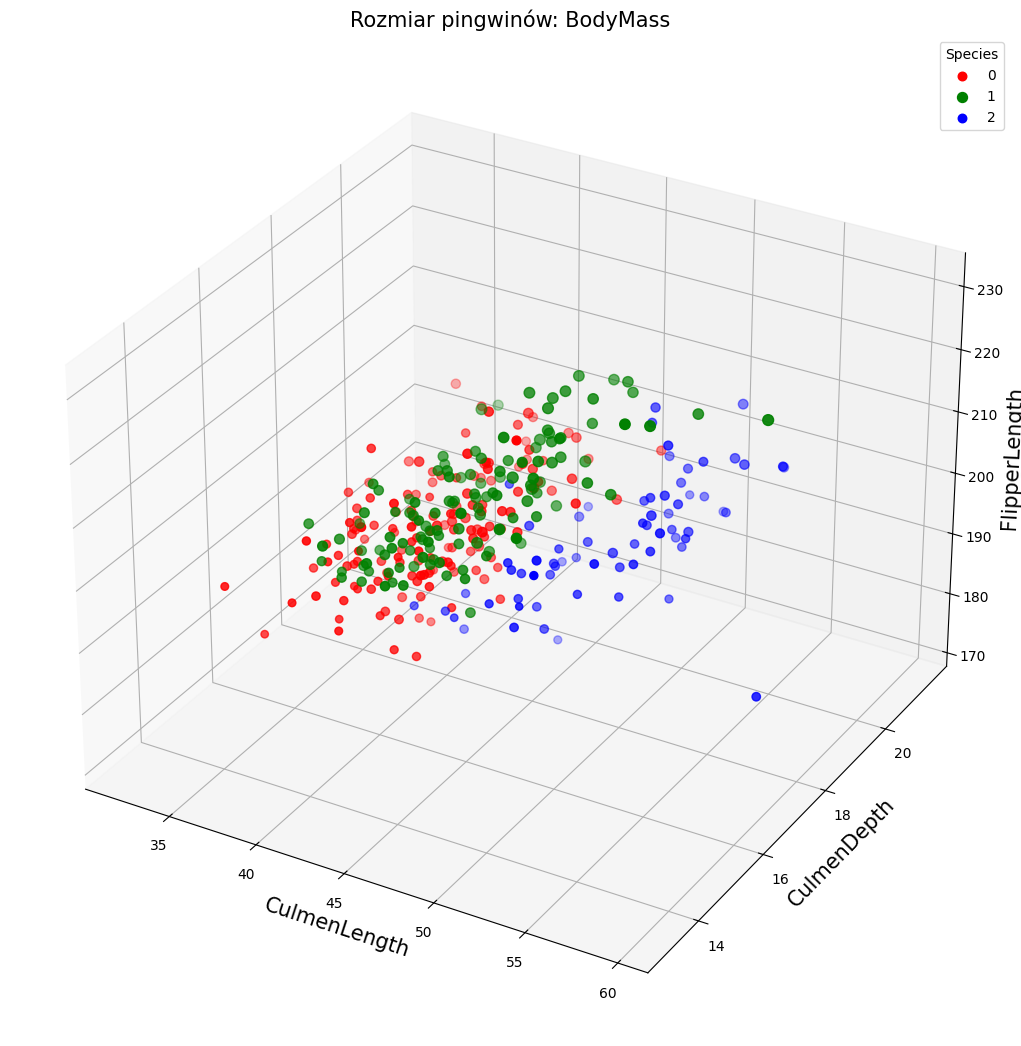

In [37]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=penguin.loc[penguin['Species']==0, 'CulmenLength'],
                 ys=penguin.loc[penguin['Species']==0,'CulmenDepth'],
                 zs=penguin.loc[penguin['Species']==0, 'FlipperLength'],
                 s=penguin.loc[penguin['Species']==0,'BodyMass']*0.01,
                 c='red', label='0')
img = ax.scatter(xs=penguin.loc[penguin['Species']==1, 'CulmenLength'],
                 ys=penguin.loc[penguin['Species']==1,'CulmenDepth'],
                 zs=penguin.loc[penguin['Species']==1, 'FlipperLength'],
                 s=penguin.loc[penguin['Species']==1,'BodyMass']*0.01,
                 c='green', label='1')
img = ax.scatter(xs=penguin.loc[penguin['Species']==2, 'CulmenLength'],
                 ys=penguin.loc[penguin['Species']==2,'CulmenDepth'],
                 zs=penguin.loc[penguin['Species']==2, 'FlipperLength'],
                 s=penguin.loc[penguin['Species']==2,'BodyMass']*0.01,
                 c='blue', label='2')
ax.set_xlabel(xlabel='CulmenLength', size=15)
ax.set_ylabel(ylabel='CulmenDepth', size=15)
ax.set_zlabel(zlabel='FlipperLength', size=15)
ax.set_title('Rozmiar pingwinów: BodyMass', size=15)
plt.legend(title='Species')
plt.show()

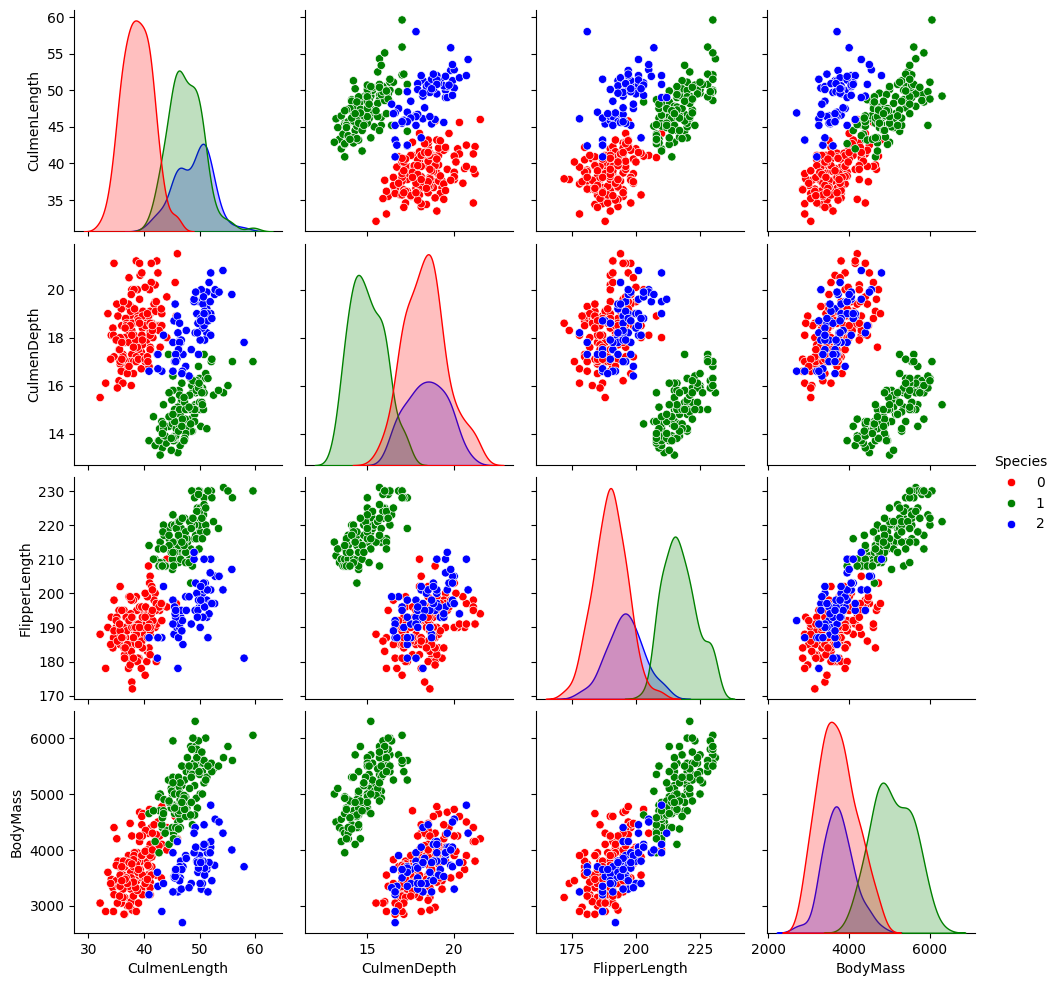

In [38]:
sns.pairplot(penguin,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

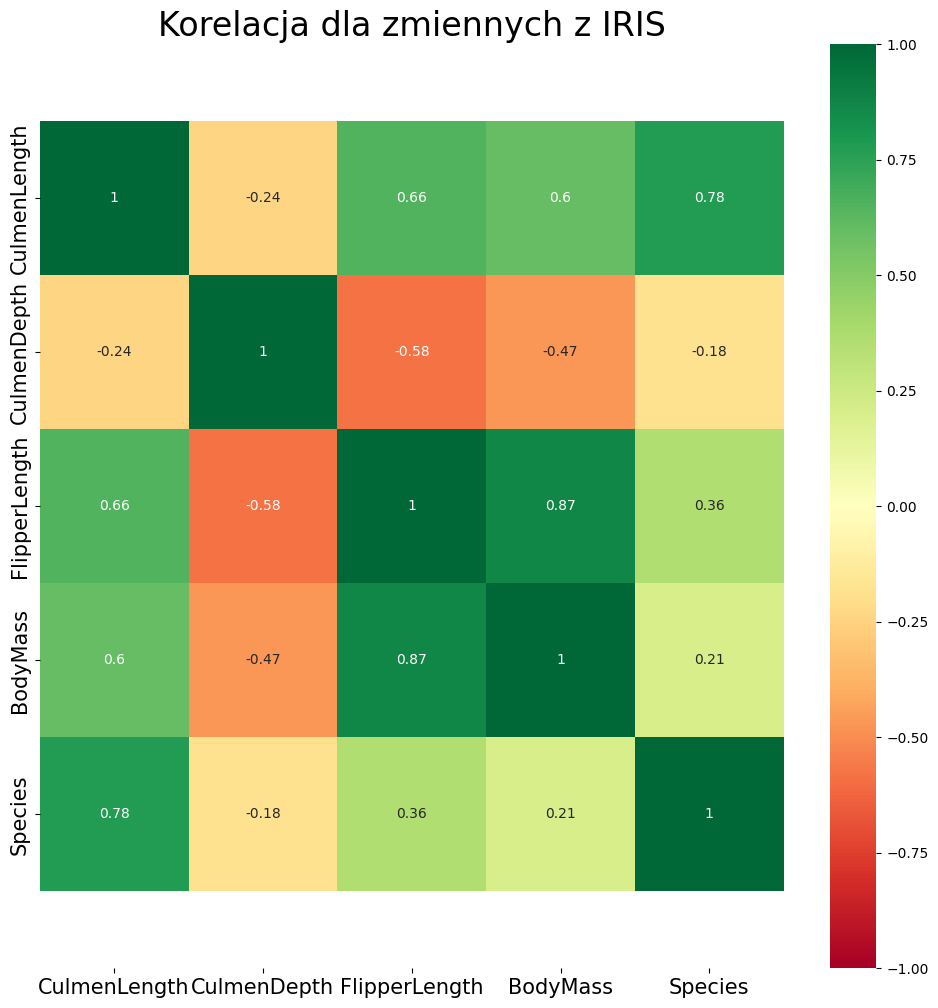

In [39]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(penguin.corr(),
                 xticklabels=penguin.corr().columns,
                 yticklabels=penguin.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z IRIS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = penguin.drop('Species', axis=1).copy()
y = penguin['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_penguin = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_penguin.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_penguin[['PC1', 'PC2','PC3','PC4']] = train_penguin[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_penguin.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,-2.781867e-16,2.152334e-17,2.200462e-17,0.449861
PC2,-2.781867e-16,1.000000e+00,2.077110e-16,2.073192e-18,0.370574
PC3,2.152334e-17,2.077110e-16,1.000000e+00,7.840512e-17,0.616517
PC4,2.200462e-17,2.073192e-18,7.840512e-17,1.000000e+00,-0.060144
Species,4.498607e-01,3.705740e-01,6.165168e-01,-6.014422e-02,1.000000


In [41]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

# transformer = wartości numeryczne  ;)
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, features),
])

data_preparation.fit_transform(X_train)

array([[  38.6,   17. ,  188. , 2900. ],
       [  39.7,   17.7,  193. , 3200. ],
       [  54.3,   15.7,  231. , 5650. ],
       ...,
       [  35.7,   18. ,  202. , 3550. ],
       [  39.5,   17.8,  188. , 3300. ],
       [  37.8,   17.3,  180. , 3700. ]])

In [42]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score_test','F1_score_train','AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked, X_trained,y_trained):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_train= model.predict(X_trained)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=1)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric_test = f1_score(y_checked, predictions,average = 'weighted')
    f1_metric_train = f1_score(y_trained, predictions_train,average = 'weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba,multi_class = 'ovo')

    metrics_dataframe = metrics_dataframe.append({
                                                'Model': name,
                                                'F1_score_test': f1_metric_test,
                                                'F1_score_train': f1_metric_train, 
                                                'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



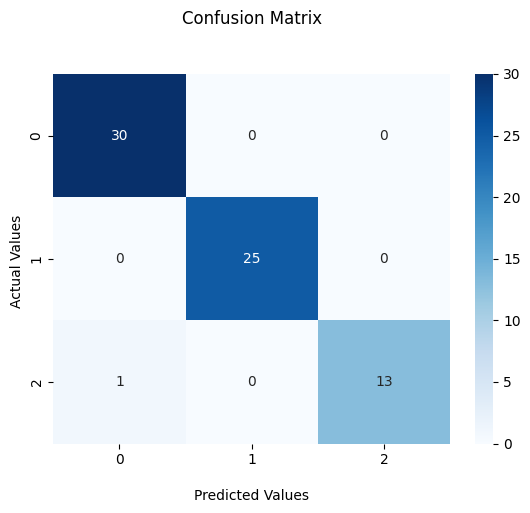

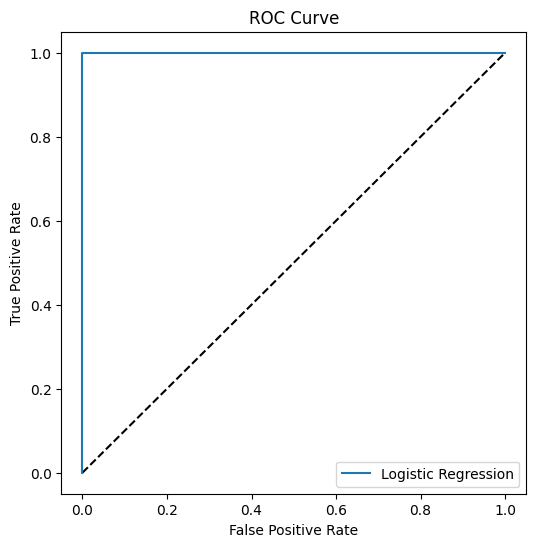

C:\Users\kamil\AppData\Local\Temp\ipykernel_19800\2825158718.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({


,Model,F1_score_test,F1_score_train,AUC
0,Logistic Regression,0.985358,0.996327,1.0


In [43]:
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])
model_pipeline_v1.fit(X_train, y_train)
calculate_metrics(model_pipeline_v1, 'Logistic Regression', X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



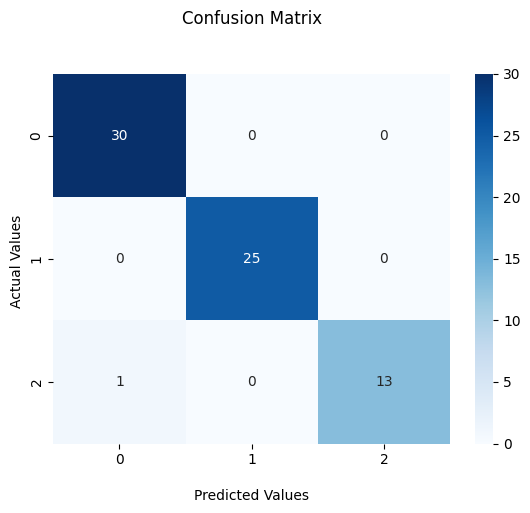

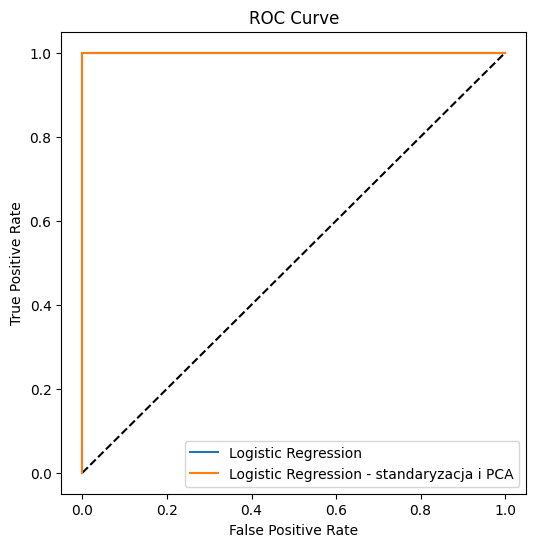

C:\Users\kamil\AppData\Local\Temp\ipykernel_19800\2825158718.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({


,Model,F1_score_test,F1_score_train,AUC
0,Logistic Regression,0.985358,0.996327,1.0
1,Logistic Regression - standaryzacja i PCA,0.985358,0.992635,1.0


In [44]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])
# transformer = wartości numeryczne ;)
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, features)
])
model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])
model_pipeline_v2.fit(X_train, y_train)
calculate_metrics(model_pipeline_v2, 'Logistic Regression - standaryzacja i PCA', X_test, y_test, X_train, y_train)

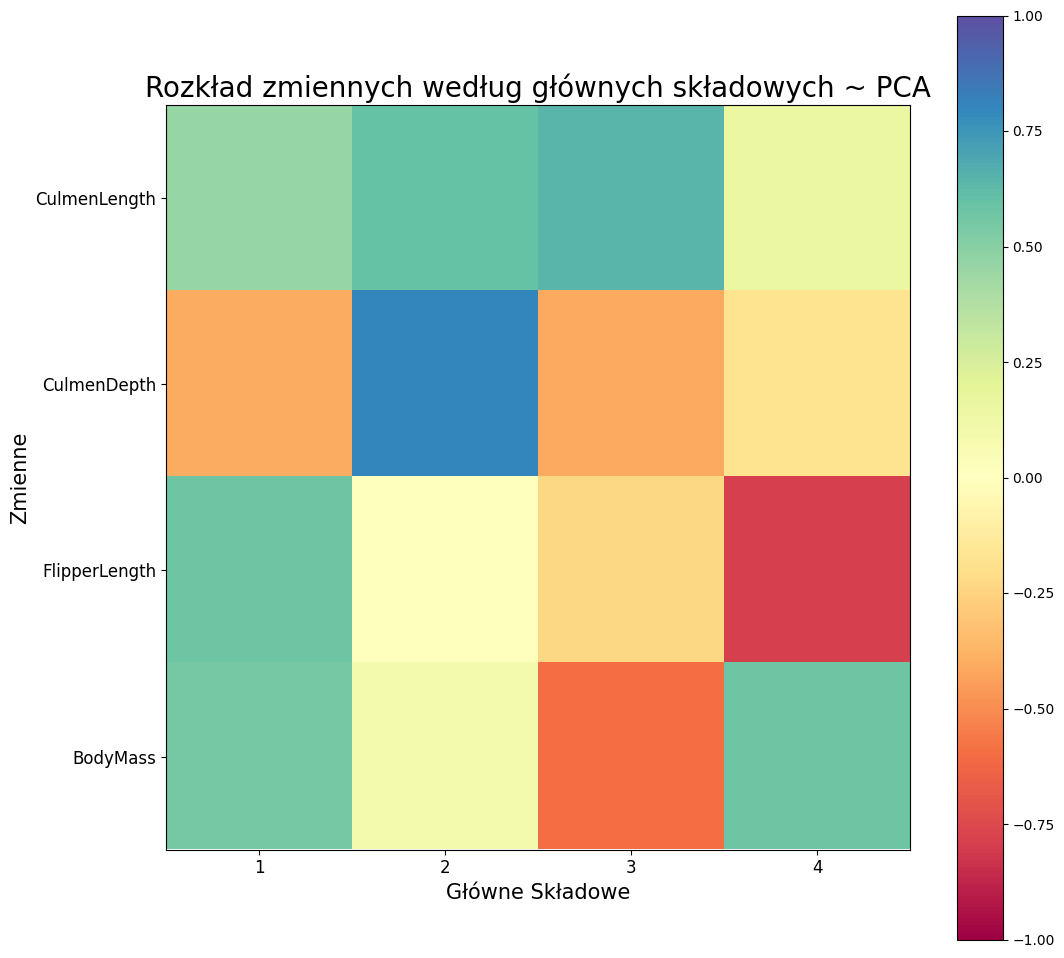

In [45]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

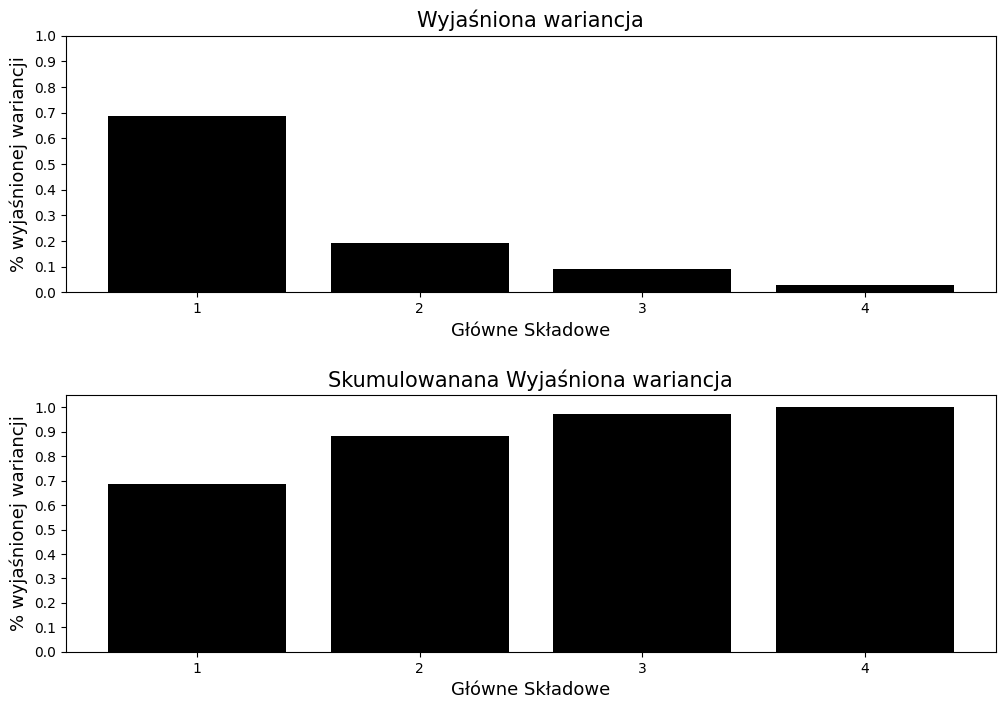

Główna składowa: 1, Wyjaśniona wariancja: 0.68729, Skumulowana Wyjaśniona wariancja: 0.68729
Główna składowa: 2, Wyjaśniona wariancja: 0.19356, Skumulowana Wyjaśniona wariancja: 0.88085
Główna składowa: 3, Wyjaśniona wariancja: 0.09119, Skumulowana Wyjaśniona wariancja: 0.97205
Główna składowa: 4, Wyjaśniona wariancja: 0.02795, Skumulowana Wyjaśniona wariancja: 1.0


In [46]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

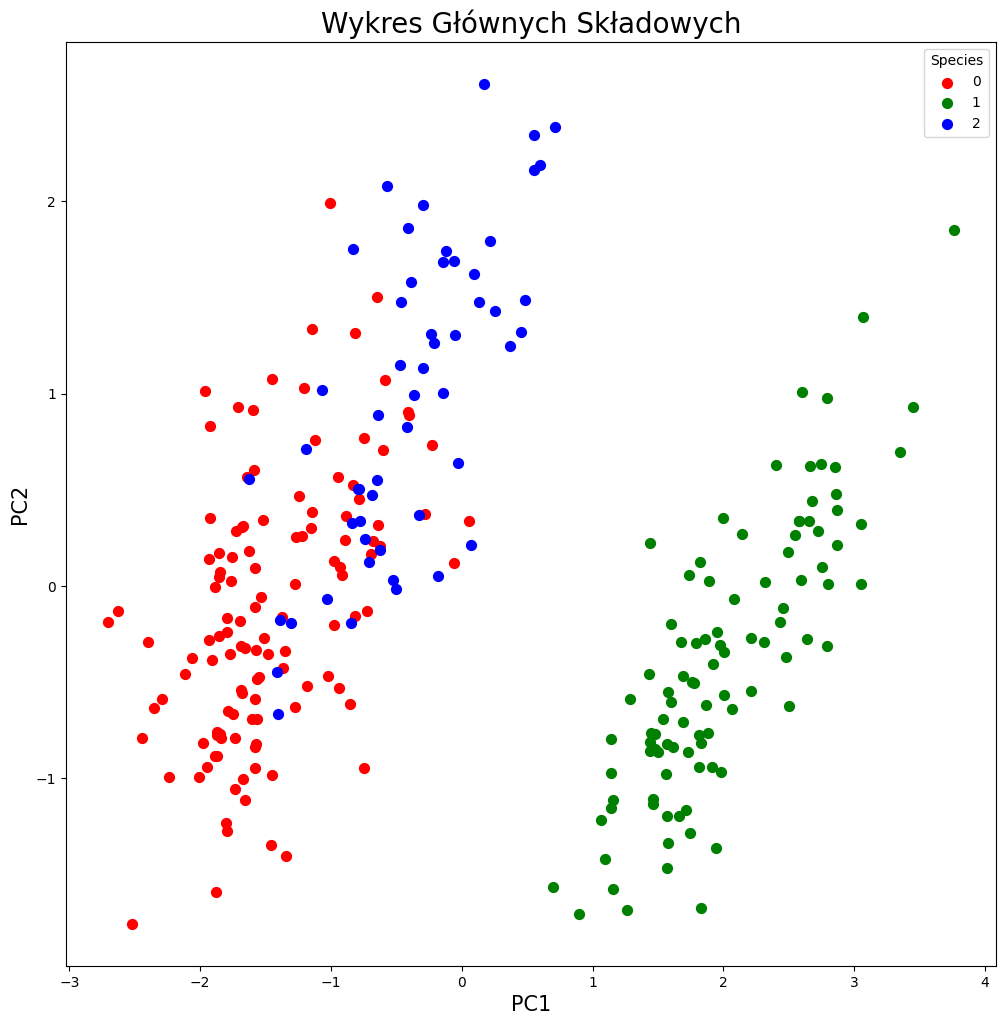

In [47]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_penguin.loc[train_penguin['Species']== 0, 'PC1'],
            y=train_penguin.loc[train_penguin['Species']== 0,'PC2'],
            c='red', label='0', s=50)
plt.scatter(x=train_penguin.loc[train_penguin['Species']== 1, 'PC1'],
            y=train_penguin.loc[train_penguin['Species']== 1,'PC2'],
            c='green', label='1', s=50)
plt.scatter(x=train_penguin.loc[train_penguin['Species']== 2, 'PC1'],
            y=train_penguin.loc[train_penguin['Species']== 2,'PC2'],
            c='blue', label='2', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = []

not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.append(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.append(['Skalowane dane', scaled_data[0], scaled_data[1]])

PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.append(['4 PC', PC4_data[0], PC4_data[1]])

PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.append(['3 PC', PC3_data[0], PC3_data[1]])

PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.append(['2 PC', PC2_data[0], PC2_data[1]])

PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1], y_train, y_test)
results.append(['1 PC', PC1_data[0], PC1_data[1]])

df = pd.DataFrame(results, columns=['Model', 'Dokładność', 'Czas trenowania (microseconds)'])

print(tabulate(df, headers='keys', tablefmt='pretty'))

+---+-------------------+------------+--------------------------------+
|   |       Model       | Dokładność | Czas trenowania (microseconds) |
+---+-------------------+------------+--------------------------------+
| 0 | Nieskalowane dane |   0.9855   |             202996             |
| 1 |  Skalowane dane   |    1.0     |              2000              |
| 2 |       4 PC        |    1.0     |              2000              |
| 3 |       3 PC        |    1.0     |              2000              |
| 4 |       2 PC        |   0.942    |              2000              |
| 5 |       1 PC        |   0.9275   |              2000              |
+---+-------------------+------------+--------------------------------+


In [50]:
Model trenowany na nieskalowanych danych osiąga najniższą dokładność (0.8955).
Skalowanie danych znacząco poprawia dokładność modelu do 0.9871.
Modele trenowane na danych po PCA z różną liczbą głównych składowych (od 4 do 1) osiągają dokładność porównywalną lub wyższą niż model trenowany na danych skalowanych.
Wszystkie pozostałe modele, w tym skalowane oraz te po PCA, mają znacznie krótszy czas trenowania . To sugeruje, że zarówno skalowanie danych, jak i zastosowanie PCA przyspiesza trenowanie modelu.

SyntaxError: invalid syntax (466681541.py, line 1)